# Homework 7: Confidence Intervals and Sample Size

## Due Thursday March 5th, 11:59pm

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [17]:
#: Don't change this cell; just run it. 

import numpy as np
import babypandas as bpd
import math

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw.ok')
_ = ok.auth(inline=True,force = True)

Assignment: Homework 7: Confidence Intervals and Sample Size
OK, version v1.14.18


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: v0ogyDk7D7h31Dht145TF1ChaaIoZ8
Successfully logged in as yuc330@ucsd.edu


**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

## 1. Polling


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.49 |
|Candidate T | 0.36 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [ ]:
#: run this cell to display the results of the survey -- don't change this cell!
votes = bpd.DataFrame().assign(vote=np.array(['C']*490 + ['T']*360 + ['J']*80 + ['S']*30 + ['U']*40))
votes = votes.sample(votes.shape[0],replace=False)
num_votes = votes.shape[0]
votes

Below, we have given you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

In [ ]:
#: run the bootstrap!
def proportions_in_resamples():
    statistics = np.array([])
    for i in np.arange(1000):
        bootstrap = votes.sample(num_votes, replace = True)
        sample_statistic = np.count_nonzero(bootstrap.get('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

boot_proportions = proportions_in_resamples()
bpd.DataFrame().assign(Estimated_Proportion=boot_proportions).plot(kind='hist',bins=np.arange(0.2,0.6,0.01))

**Question 1.1.** Using the array `boot_proportions`, compute an approximate 95% confidence interval for the true proportion of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

In [ ]:
#...lower_bound
lower_bound = np.percentile(boot_proportions,2.5)
lower_bound

In [ ]:
#...upper_bound
upper_bound = np.percentile(boot_proportions,97.5)
upper_bound

In [ ]:
#: print the confidence interval
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(lower_bound, upper_bound))

In [ ]:
#: grade
_ = ok.grade('q1_1')

**Question 1.2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use confidence intervals to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{(Candidate C's proportion of the vote)} - \text{(Candidate T's proportion of the vote)}.$$

Use the bootstrap with 1000 resamples to compute an approximate distribution for Candidate C's lead over Candidate T, and store your bootstrap estimates in an array called `boot_leads`. Plot a histogram of the resulting samples.

*Hint*: Use the code for `proportions_in_resamples` given to you above as a starting point.

In [ ]:
#DELETE
def leads_in_resamples():
    statistics = np.array([])
    for i in np.arange(1000):
        bootstrap = votes.sample(num_votes, replace = True)
        sample_statistic = np.count_nonzero(bootstrap.get('vote') == 'C')/num_votes - np.count_nonzero(bootstrap.get('vote') == 'T')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

boot_leads = leads_in_resamples()
bpd.DataFrame().assign(Estimated_Lead = boot_leads).plot(kind='hist', bins=np.arange(-0.2,0.2,0.01))

In [ ]:
#: grade
_ = ok.grade('q1_2')

**Question 1.3.** Compute an approximate 95% confidence interval for the difference in proportions.

In [ ]:
#...diff_lower_bound 
diff_lower_bound = np.percentile(boot_leads,2.5)
diff_lower_bound

In [ ]:
#...diff_upper_bound
diff_upper_bound = np.percentile(boot_leads,97.5)
diff_upper_bound

In [ ]:
#: print the confidence interval
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

In [ ]:
#: grade
_ = ok.grade('q1_3')

The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.46, .52]$$

(Your answer might have been slightly different, but that doesn't mean it was wrong since the data was randomly sampled.)

**Question 1.4.**
Can we say that 95% of the population lies in the range $[.46, .52]$? Assign your choice to variable `q1_4`. 

1. Yes
2. No

In [ ]:
#...q1_4
q1_4 = 2

In [ ]:
#: grade
_ = ok.grade('q1_4')

**Question 1.5.**
Can we say that the true proportion of the population that will vote for Candidate C is a random quantity with approximately a 95% chance of falling between 0.46 and 0.52? Assign your choice to variable `q1_5`.

1. Yes
2. No

In [ ]:
#...q1_5
q1_5 = 2

In [ ]:
#: grade
_ = ok.grade('q1_5')

**Question 1.6.**
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be the *number* of intervals, not the proportion or percentage.

In [ ]:
#...how_many
how_many = 10000 * .95
how_many

In [ ]:
#: grade
_ = ok.grade('q1_6')

**Question 1.7.**

The staff also created 80%, 90%, and 99% confidence intervals from one sample (shown below), but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents and assign your choices in variables `q1_7_80`, `q1_7_90`, and `q1_7_99`, each for likely 80%, 90%, and 99% confidence intervals respectively.

Tip: Draw out the confidence intervals on a piece a paper to help you visualize them better.

1. $[.464,.517]$

2. $[.47,.511]$ 

3. $[.446,.533]$

In [ ]:
#...q1_7_80
q1_7_80 = 2

In [ ]:
#...q1_7_90
q1_7_90 = 1

In [ ]:
#...q1_7_99
q1_7_99 = 3

In [ ]:
#: grade
_ = ok.grade('q1_7')

## 2. Hardest Writing Course
Suppose it's application season and you're a current high school senior looking to apply to the prestigious UCSD for data science. Also, suppose you dislike writing and want to strategically analyze all the UCSD college writing courses, to figure out colleges to avoid applying to and colleges where you have the best shot at getting a decent grade. Luckily, UCSD has data on its CAPES website about writing courses (except for Muir's writing course due to unknown reasons). Each row corresponds to a particular quarter and course, and the data includes the name of the course, the average study hours per week for the quarter, and the average grade for the quarter (on a GPA scale). Now it's time to analyze and figure out whether the writing course rumors are true (or people just like complaining). 

In [18]:
# Run this cell to read data; don't change it
writing = bpd.read_csv("writing_courses_ucsd.csv", index_col = 0)
writing.iloc[:5]

,course,Study Hrs/wk,grades
0,HUM,6.32,3.03
1,HUM,7.46,3.14
2,HUM,5.90,3.02
3,HUM,6.04,3.01
4,HUM,6.37,3.10


**Question 2.1a.** The first thing to do before jumping into analysis is to figure out the mean study hours and mean grade for each course. Create a table called `course_means` that has index as `course` and columns consist of `Study Hrs/wk` and `grades`. `Study Hrs/wk` and `grades` contain the means of `Study Hrs/wk` and `grades` respectively. 

In [19]:
#...course_means
course_means = writing.groupby("course").mean()
course_means

,Study Hrs/wk,grades
course,,
CAT,4.963670,3.142661
DOC,5.288857,3.195942
HUM,6.707935,2.888043
MMW,7.164597,3.085877
WCWP,8.011500,3.033425


In [ ]:
#: grade
_ = ok.grade('q2_1a')

**Question 2.1b.** You may have noticed that the mean grades for some courses is `nan`. This means that some grades are missing for these courses (missing values are represented by `nan`). Drop all the rows in the `writing` table that contain missing values and assign the new table to the variable `writing_fixed`. After this, create a table called `course_means_fixed` with no `nan` values in the `grades` column.

Hint: [np.isnan](https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html) or [np.isfinite](https://docs.scipy.org/doc/numpy/reference/generated/numpy.isfinite.html) might be useful.

In [20]:
#...writing_fixed
writing_fixed = writing[np.isfinite(writing.get("grades"))]
writing_fixed

,course,Study Hrs/wk,grades
0,HUM,6.32,3.03
1,HUM,7.46,3.14
2,HUM,5.90,3.02
3,HUM,6.04,3.01
4,HUM,6.37,3.10
...,...,...,...
470,CAT,6.58,2.25
471,CAT,4.67,2.82
472,CAT,5.65,2.91
473,CAT,5.97,2.77


In [21]:
#...course_means_fixed
course_means_fixed = writing_fixed.groupby('course').mean()
course_means_fixed

,Study Hrs/wk,grades
course,,
CAT,4.963670,3.142661
DOC,5.232029,3.195942
HUM,6.707935,2.888043
MMW,7.141404,3.085877
WCWP,7.732055,3.033425


In [ ]:
#: grade
_ = ok.grade('q2_1b')

**Question 2.2.** Revelle's writing course HUM seems to have pretty low average grade. Produce 1,000 bootstrapped estimates for the average grade of HUM. Store the estimates in the `hum_averages` array. Use this `hum_averages` array to plot a histogram of the estimated averages. The label on the x-axis should be "Estimated Average Grades for HUM".

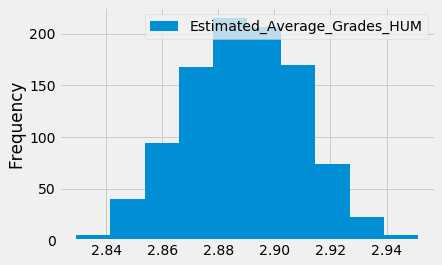

In [22]:
#...hum_averages
hum_averages = np.array([])
hum = writing_fixed[writing_fixed.get('course')=='HUM']
for i in np.arange(1000):
    resample = hum.sample(hum.shape[0], replace=True)
    average = resample.get('grades').mean()
    hum_averages = np.append(hum_averages, average)

bpd.DataFrame().assign(Estimated_Average_Grades_HUM=hum_averages).plot(kind='hist')

Use the `hum_averages` array to calculate an approximate 95% confidence interval for the true average grade. Assign the the corresponding bounds to `lower_bound` and `upper_bound`. Do NOT round the bounds.

In [23]:
#...lower_bound
lower_bound = np.percentile(hum_averages,2.5)
lower_bound

2.8485815217391295

In [24]:
#...upper_bound
upper_bound = np.percentile(hum_averages,97.5)
upper_bound

2.928717391304348

In [ ]:
#: grade
_ = ok.grade('q2_2')

**Question 2.3.** You want to create a similar histogram for each of the other courses, and also calculate the corresponding confidence intervals. Repeating the process above 4 times would be time-consuming. Create a function called `ci_and_hist`, which takes in a course name as its input, plots the histogram for 1,000 bootstrapped estimates for the average grade and returns a `str` describing the approximate 95% confidence interval for the course (see the example below).

For example, `ci_and_hist('HUM')` should plot the same histogram in Question 2 and return 'The 95% confidence interval for HUM is [2.85, 2.93]', where the 2.85 and 2.93 were calculated by rounding `lower_bound` and `upper_bound` to two decimal places. 

**Note:** For the returned string, make sure you follow the format above and remember to change the course name and the confidence interval for different courses. For the histogram, the label on the x-axis should also change accordingly to the courses.

In [25]:
#DELETE
def ci_and_hist(course_name):
    averages = np.array([])
    course = writing_fixed[writing_fixed.get('course')==course_name]
    for i in np.arange(1000):
        resample = course.sample(course.shape[0], replace=True)
        average = resample.get('grades').mean()
        averages = np.append(averages, average)
    lower = round(np.percentile(averages, 2.5), 2)
    upper = round(np.percentile(averages, 97.5), 2)
    bpd.DataFrame().assign(Estimated_Average_Grades=averages).plot(kind='hist')
    return("The 95% confidence interval for {} is [{}, {}]".format(course_name, lower, upper))

In [ ]:
#try it out
ci_and_hist('WCWP')

In [ ]:
for i in range(10):
    a = ci_and_hist('WCWP') 
    print(a == 'The 95% confidence interval for WCWP is [3.01, 3.05]')

In [ ]:
#: grade
_ = ok.grade('q2_3')

**Question 2.4.** Your friend claims that Sixth's writing course CAT is actually not as hard as everyone says. She says that because our CAPE data is only a sample of the full population of course offerings, the actual average grade for CAT could be 3.25. Run the cell below to use the `ci_and_hist` function you defined above to calculate an approximate 95% confidence interval for the average grade in CAT. Can you reject her hypothesis using this confidence interval? Assign your answer to variable `q2_4`.

1. Yes, the confidence interval includes 3.25
2. No, the confidence interval includes 3.25
3. Yes, the confidence interval doesn't include 3.25
4. No, the confidence interval doesn't include 3.25

In [ ]:
ci_and_hist("CAT")

In [ ]:
#...q2_4
q2_4 = 3

In [ ]:
#: grade
_ = ok.grade('q2_4')

**Question 2.5a.** Now that you've looked at the average grades for different courses, you're curious about the average amount of time each writing course requires. This time, you'll test whether each individual course has the same average study hours per week as that of all the writing courses combined. 

First, produce 1,000 bootstrapped estimates for the average study hours per week of all the writing courses combined. Use these estimates to produce an approximate 99% confidence interval for the true average study hours. Round the bounds of the confidence interval to 2 decimal places and save them into `study_lower_bound` and `study_upper_bound`.

In [ ]:
#DELETE
averages = np.array([])
course = writing_fixed
for i in np.arange(1000):
    resample = course.sample(course.shape[0], replace=True)
    average = resample.get('Study Hrs/wk').mean()
    averages = np.append(averages, average)

In [ ]:
#...study_lower_bound
study_lower_bound = round(np.percentile(averages, 0.5), 2)
study_lower_bound

In [ ]:
#...study_upper_bound
study_upper_bound = round(np.percentile(averages, 99.5), 2)
study_upper_bound

In [ ]:
#: grade
_ = ok.grade('q2_5a')

**Question 2.5b.** Compare the average study hours for each individual writing course to the average study hours of all writing courses combined. Your final answer should be a 5 element array named `study_hypotheses`.

In the order of `[CAT, DOC, HUM, MMW, WCWP]`, the corresponding element in the array `study_hypotheses` should be -1 if the course's average study hours is significantly lower than that of all the writing courses combined, 0 if you cannot reject the hypothesis that the course has the same average study hours as that of all the courses combined, and 1 if the course's average study hours is significantly higher than that of all the courses combined. You may want to use the `course_means_fixed` table you created in Question 1b.

**Note:** It's okay to hard code your answer for this question.

In [ ]:
writing.get('Study Hrs/wk').mean()

In [ ]:
course_means_fixed

In [ ]:
#...study_hypotheses
study_hypotheses = np.array([-1, -1, 1, 1, 1])
study_hypotheses

In [ ]:
#: grade
_ = ok.grade('q2_5b')

## 3. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by $$\frac{\text{sd of the original distribution}}{\sqrt{\text{sample size}}}$$ In other words, suppose we start with *any distribution* that has standard deviation $\sigma$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

**Question 3.1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [ ]:
#DELETE
# write your function `simulate_sample_n` here
def simulate_sample_n(n):
    coin = np.array([.5, .5])
    proportions = np.array([])
    for i in np.arange(5000):
        heads, tails = np.random.multinomial(n, coin)/n
        proportions = np.append(proportions, heads)
    return proportions


simulate_sample_n(5)

In [ ]:
# write your function `simulate_sample_n` here
def simulate_sample_n(n):
    ...


simulate_sample_n(5)

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. The x- and y-scales are kept the same to facilitate comparisons.

In [ ]:
#: run this cell to visualize
bins = np.arange(-0.01,1.05,0.02)

for sample_size in np.array([2, 5, 10, 20, 50, 100, 200, 400]):
    bpd.DataFrame().assign(**{'Sample_Size:{}'.format(sample_size) : simulate_sample_n(sample_size)}).plot(kind = 'hist', bins=bins)
    plots.ylim(0, 3000)

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported flight delay data and computed the standard deviation  of delay time (in minutes):

In [ ]:
#: run this cell, but don't change it under penalty of law!
united = bpd.read_csv('united_summer2015.csv')
united_std = np.std(united.get('Delay'))
united_std

**Question 3.2.** Write a function called `predict_sd`.  It takes a sample size `n` (a number) as its argument.  It returns the predicted standard deviation of the sample mean for samples of size `n` from the flight delays, according to the CLT.

In [ ]:
# write your function here
def predict_sd(n):
    ...

predict_sd(10)

In [ ]:
#DELETE
# write your function here
def predict_sd(n):
    return united_std/(n**0.5)

predict_sd(10)

In [ ]:
#: the following should be True
39.45 <= predict_sd(1) <= 39.485

In [ ]:
8.7<=predict_sd(20)<= 9

In [ ]:
#: grade
_ = ok.grade('q3_2')

**Question 3.3.** Write a function called `empirical_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `simulate_sample_n` function you wrote earlier.

In [ ]:
# write your function here
def empirical_sd(n):
    ...

empirical_sd(10)

In [ ]:
#DELETE
def empirical_sd(n):
    sample_means = np.array([])
    for i in np.arange(500):
        sample = united.sample(n)  
        sample_mean = sample.get('Delay').mean()
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sd(10)

In [ ]:
#: this should be True
28 <= empirical_sd(1) <= 50

In [ ]:
_ = ok.grade('q3_3')

The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes. It may take a few moments to run.

In [ ]:
#: run this cell to visualize
sd_table = bpd.DataFrame().assign(Sample_Size = np.arange(1,101))
predicted = sd_table.get('Sample_Size').apply(predict_sd)
empirical = sd_table.get('Sample_Size').apply(empirical_sd)
sd_table = sd_table.assign(Predicted_SD = predicted, Empirical_SD = empirical)
plots.scatter(sd_table.get('Sample_Size'),sd_table.get('Empirical_SD'),label = 'Empirical_SD')
plots.scatter(sd_table.get('Sample_Size'),sd_table.get('Predicted_SD'),label ='Predicted_SD')
plots.legend()

## 4. Polling and the Normal Distribution


Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal or vertical axes), called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 215 of the 400 sampled voters will vote in favor of the proposition.

In [ ]:
#: run this cell, but don't change it!
sample = bpd.DataFrame().assign(
    Vote =np.array(["Yes", "No"]),
    Count= np.array([215,   185]))
sample_size = sample.get("Count").sum()
sample_proportions = sample.assign(
    Proportion=sample.get("Count") / sample_size)
sample_proportions

She uses 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  Run the next cell to see the empirical distribution of Yes proportions in the 10,000 resamples.

In [ ]:
#: run this cell, but don't change it!
resample_yes_proportions = np.array([])
for i in np.arange(10000):
    resample = np.random.multinomial(sample_size,sample_proportions.get("Proportion"))/sample_size
    resample_yes_proportions = np.append(resample_yes_proportions, resample[0])
bpd.DataFrame().assign(Resample_Yes_proportion = resample_yes_proportions).plot(kind = 'hist',bins=np.arange(.2, .8, .01))

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\text{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is a fun exercise for those who enjoy algebra -- and who doesn't?)

**Question 4.1.**
**Without accessing the data in `resample_yes_proportions` in any way**, and instead using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, compute a number `approximate_sd` that's the predicted standard deviation of the array `resample_yes_proportions` according to the Central Limit Theorem. Since you don't know the true proportions of 0s and 1s in the population, use the proportions in the sample instead (since they're probably similar).

In [ ]:
#...approximate_sd
approximate_sd = np.sqrt((sample_proportions.get('Proportion').loc[1])*((sample_proportions.get('Proportion').loc[0])))/np.sqrt(400)
approximate_sd

In [ ]:
#: grade
_ = ok.grade('q4_1')

**Question 4.2.**
Compute the standard deviation of the array `resample_yes_proportions` to verify that your answer to question 2 is approximately right.

In [ ]:
#...exact_sd
exact_sd = np.std(resample_yes_proportions)
exact_sd

In [ ]:
#: grade
_ = ok.grade('q4_2')

**Question 4.3.**
**Still without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.  The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint*: Before, we've used `percentile` on the bootstrap distribution to find the bounds for the confidence interval. Now, we're not allowed to use the bootstrap distribution -- but we don't need it! We know (from the Central Limit Theorem) that the distribution of the sample mean is Normal with a certain standard deviation. We also know that 95% of the area of the normal distribution falls within a certain number of standard deviations from the mean.

If you're still stuck, try studying [Section 14.3](https://ucsd-ets.github.io/dsc10-fa18-textbook/chapters/14/3/SD_and_the_Normal_Curve) in the textbook.

In [ ]:
#...lower_limit
lower_limit = sample_proportions.get('Proportion').iloc[0]-2*approximate_sd
lower_limit

In [ ]:
#...upper_limit
upper_limit = sample_proportions.get('Proportion').iloc[0]+2*approximate_sd
upper_limit

In [ ]:
#: print the confidence interval
print('lower:', lower_limit, 'upper:', upper_limit)

In [ ]:
#: grade
_ = ok.grade('q4_3')

In [ ]:
# Run this cell to plot your confidence interval.
bpd.DataFrame().assign(Resample_Yes_proportion = resample_yes_proportions).plot(bins=np.arange(.2, .8, .01),kind = 'hist')
plots.plot(np.array([lower_limit, upper_limit]), np.array([0,0]), c='r', lw=10);

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning. To have more confidence in the result of the poll, the decide to redo it with a larger sample. They'd be happy if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle computes the smallest sample size necessary in order to be confident that the standard deviation of the sample mean is only 0.005.

**Question 4.4.**
What sample size did she find? Assign your answer to the variable `sample_size`. Remember the sample size needs to be an integer.

In [ ]:
#...sample_size
sigma = np.sqrt(215/400 * (1-(215/400)))
sample_size = math.ceil((sigma / .005)**2)
sample_size

In [ ]:
isinstance(sample_size, int)

We know that $$\text{sample means SD} = \frac{\text{population SD}}{\sqrt{\text{sample size}}},$$
so
$$\text{sample size} = \left(\frac{\text{population SD}}{\text{sample means SD}}\right)^2 = \left(\frac{\sqrt{\left(\frac{215}{400}\right)\left(\frac{185}{400}\right)}}{0.005}\right)^2 = 9943.75.$$

In [ ]:
#: grade
_ = ok.grade('q4_4')

# Finish Line

Congratulations, you're done with the lab!  Be sure to

- **Verify that all tests pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**

In [ ]:
#: Run all tests at once
import os
_ = [ok.grade(q[:-3]) for q in os.listdir('tests') if q.startswith('q')]

## Before submitting, select "Kernel" -> "Restart & Run All" from the menu!

Then make sure that all of your cells ran without error.

In [ ]:
#: run this to submit your homework
_ = ok.submit()